In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier

In [ ]:
tracks_tagged = pd.read_csv('drive/MyDrive/xplore/tracks_tagged_v5.csv')
tracks_tagged

,id_track,id_site,id_m2,source,duration,alarm,min_speed,max_speed,avg_speed,curviness,...,repairs,distress,other,miss_ais,violation,le_contact,tdate,ttime,type_m2_agg,activity
0,29980760,10,18-0704-1000,radar,637,0,7.1,14.4,10.636634,1.023164,...,0,0,0,0,0,0,2023-07-04,10:06:47,NaN,NaN
1,30278317,10,158-0714-0950,radar,5463,1,0.1,6.7,3.016000,2.591425,...,0,0,0,0,0,0,2023-07-14,10:45:04,sail,drifting
2,30281714,10,196-0714-1032,radar,572,0,0.1,2.1,0.694318,1.300154,...,0,0,0,0,0,0,2023-07-14,10:43:06,NaN,NaN
3,30282211,10,1-0714-1040,radar,581,0,4.0,26.5,12.441758,1.068525,...,0,0,0,0,0,0,2023-07-14,10:42:50,NaN,NaN
4,31250251,10,63-0811-1036,radar,1379,1,0.7,13.7,10.932418,1.034715,...,0,0,0,0,0,0,2023-08-11,10:43:51,fishing_boat,transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,42812042,45,5-1027-1120,radar,768,0,10.6,20.0,18.883486,1.005054,...,0,0,0,0,0,0,2024-12-19,12:24:26,NaN,NaN
4362,42812149,45,104-1027-1132,radar,2033,0,6.1,9.4,7.748220,1.004563,...,0,0,0,0,0,0,2024-12-19,12:24:30,NaN,NaN
4363,42812396,45,19-1027-1155,radar,758,0,5.9,9.6,7.920661,1.020434,...,0,0,0,0,0,0,2024-12-19,12:24:34,NaN,NaN
4364,42815993,45,66-1027-1728,radar,710,0,14.2,18.9,17.808850,1.002597,...,0,0,0,0,0,0,2024-12-19,12:25:03,NaN,NaN


In [ ]:
tracks_tagged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_track      4366 non-null   int64  
 1   id_site       4366 non-null   int64  
 2   id_m2         4366 non-null   object 
 3   source        4366 non-null   object 
 4   duration      4366 non-null   int64  
 5   alarm         4366 non-null   int64  
 6   min_speed     4366 non-null   float64
 7   max_speed     4366 non-null   float64
 8   avg_speed     4366 non-null   float64
 9   curviness     4366 non-null   float64
 10  heading_mean  4366 non-null   float64
 11  heading_std   4366 non-null   float64
 12  turning_mean  4366 non-null   float64
 13  turning_std   4366 non-null   float64
 14  duration_z    4366 non-null   int64  
 15  distance      4366 non-null   float64
 16  distance_o    4366 non-null   float64
 17  assoc_str     179 non-null    float64
 18  assoc_id      179 non-null  

In [ ]:
tracks_tagged['activity'].value_counts(dropna=False)

,count
activity,
NaN,1760
stopped,1143
transit,867
drifting,191
lobster,138
hook,126
fishing,76
trawl,33
seine,32


In [ ]:
features_subset = ['min_speed', 'max_speed', 'avg_speed', 'curviness', 'heading_mean', 'heading_std', 'turning_mean', 'turning_std', 'duration_z', 'distance', 'distance_o']
tracks_tagged_small = tracks_tagged.dropna(subset=['activity'])
tracks_tagged_small = tracks_tagged_small[features_subset + ['activity']]
tracks_tagged_small.shape

(2606, 12)

In [ ]:
grouped = tracks_tagged_small.groupby('activity').mean()
styled = grouped.style.background_gradient(cmap='coolwarm', axis=0)
styled

,min_speed,max_speed,avg_speed,curviness,heading_mean,heading_std,turning_mean,turning_std,duration_z,distance,distance_o
activity,,,,,,,,,,,
drifting,0.979424,7.378377,2.997718,2.068394,12.608776,0.706520,14.320642,31.107860,742.539267,4.047508,3.159141
fishing,0.252632,12.405000,3.522002,2.835578,5.662314,1.518200,19.046370,48.736884,719.013158,12.875589,5.914692
hook,0.273810,13.863571,3.046195,2.178984,26.791068,1.221753,9.152730,30.333381,997.841270,8.433587,4.149019
lobster,0.073913,11.452899,3.313813,2.760980,12.028151,1.280364,12.968829,42.917573,1136.217391,10.570868,4.531005
seine,0.381250,9.165313,3.826820,2.118693,6.972497,1.430808,4.067236,22.760540,745.468750,22.183717,11.589822
stopped,0.000000,4.654129,0.263014,113.972149,29.659435,2.732132,83.470599,88.272974,1409.282590,6.899989,0.366686
transit,7.358558,14.718973,12.309287,1.037077,36.258575,0.144509,1.708154,7.390565,772.878893,9.456411,9.073526
trawl,0.157576,5.853636,2.499051,3.455178,72.419157,1.743533,2.090465,12.246776,1442.060606,22.771418,6.392555


In [ ]:
grouped = tracks_tagged_small.groupby('activity').median()
styled = grouped.style.background_gradient(cmap='coolwarm', axis=0)
styled

,min_speed,max_speed,avg_speed,curviness,heading_mean,heading_std,turning_mean,turning_std,duration_z,distance,distance_o
activity,,,,,,,,,,,
drifting,0.500000,6.300000,2.914545,1.157675,-9.502917,0.412260,7.055000,24.702842,112.000000,1.902753,1.361299
fishing,0.000000,12.050000,3.062899,1.961278,-7.250948,1.514265,16.510770,51.068314,412.500000,11.229313,5.835887
hook,0.000000,12.350000,2.841064,1.897155,31.288669,1.211684,6.153870,31.162993,96.500000,6.998990,3.622698
lobster,0.000000,10.950000,3.071097,2.117866,1.919094,1.200991,9.984141,44.110428,718.500000,8.441371,4.213982
seine,0.000000,8.900000,3.223489,2.004796,-13.793602,1.375699,3.181815,21.255069,434.000000,21.622969,11.021385
stopped,0.000000,3.200000,0.228825,63.270863,61.404476,2.776665,86.524395,88.417376,0.000000,5.255329,0.069395
transit,6.300000,12.900000,10.610568,1.018767,21.572155,0.096333,0.741844,1.133587,428.000000,7.930018,7.557539
trawl,0.000000,4.500000,2.396456,3.258557,104.173481,1.640890,1.116979,10.595769,0.000000,15.510965,5.117407


In [ ]:
X = tracks_tagged_small.drop(columns='activity')
y = tracks_tagged_small['activity']
y, class_names = pd.factorize(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
    reg_alpha=2,
    reg_lambda=3,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7
)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.989252814738997

In [ ]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.9309815950920245

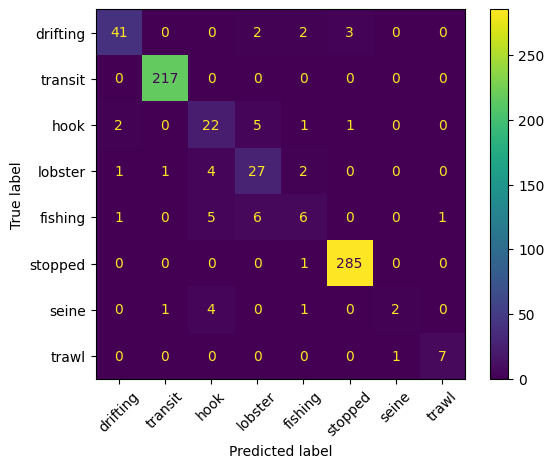

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)

In [ ]:
most_confused = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j:
            count = cm[i, j]
            most_confused.append((class_names[i], class_names[j], count))

most_confused.sort(key=lambda x: x[2], reverse=True)
for actual, predicted, count in most_confused[:5]:
    print(f"Actual: {actual}, Predicted as: {predicted} → {count} times")

Actual: fishing, Predicted as: lobster → 6 times
Actual: hook, Predicted as: lobster → 5 times
Actual: fishing, Predicted as: hook → 5 times
Actual: lobster, Predicted as: hook → 4 times
Actual: seine, Predicted as: hook → 4 times


In [ ]:
unique_class_ids = np.unique(y_test)

for i in unique_class_ids:
    label = class_names[i]
    idx = (y_test == i)
    acc = (y_test_pred[idx] == y_test[idx]).mean()
    print(f"{label}: {acc:.2f}")

drifting: 0.85
transit: 1.00
hook: 0.71
lobster: 0.77
fishing: 0.32
stopped: 1.00
seine: 0.25
trawl: 0.88


In [ ]:
print(classification_report(y_test, y_test_pred, target_names=class_names))

              precision    recall  f1-score   support

    drifting       0.91      0.85      0.88        48
     transit       0.99      1.00      1.00       217
        hook       0.63      0.71      0.67        31
     lobster       0.68      0.77      0.72        35
     fishing       0.46      0.32      0.38        19
     stopped       0.99      1.00      0.99       286
       seine       0.67      0.25      0.36         8
       trawl       0.88      0.88      0.88         8

    accuracy                           0.93       652
   macro avg       0.77      0.72      0.73       652
weighted avg       0.93      0.93      0.93       652



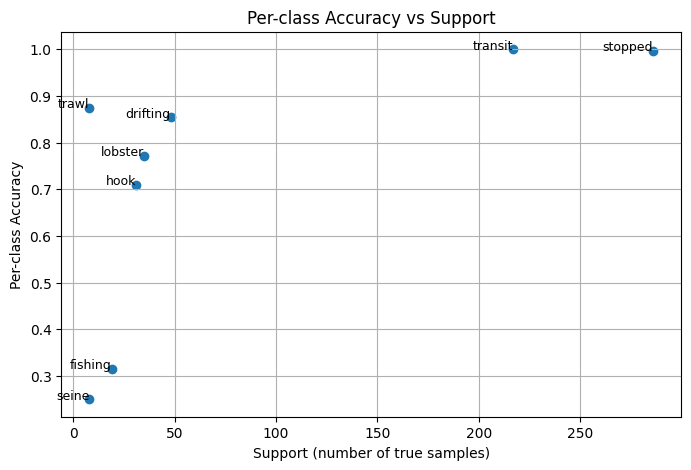

In [ ]:
accuracies = []
supports = []
labels = []

for i in np.unique(y_test):
    label = class_names[i]
    idx = (y_test == i)
    acc = (y_test_pred[idx] == y_test[idx]).mean()
    support = np.sum(idx)

    accuracies.append(acc)
    supports.append(support)
    labels.append(label)

plt.figure(figsize=(8, 5))
plt.scatter(supports, accuracies)

for i, label in enumerate(labels):
    plt.text(supports[i], accuracies[i], label, fontsize=9, ha='right')

plt.xlabel('Support (number of true samples)')
plt.ylabel('Per-class Accuracy')
plt.title('Per-class Accuracy vs Support')
plt.grid(True)
plt.show()

In [ ]:
untagged_data = tracks_tagged[tracks_tagged['activity'].isna()]
X_untagged = untagged_data[features_subset]
y_proba = model.predict_proba(X_untagged)
confidence_scores = np.max(y_proba, axis=1)
y_pred = np.argmax(y_proba, axis=1)
untagged_data['pred'] = class_names[y_pred]
untagged_data['pred_confidence'] = confidence_scores
untagged_data.sort_values('pred_confidence')

<ipython-input-65-d8c169775fc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  untagged_data['pred'] = class_names[y_pred]
<ipython-input-65-d8c169775fc3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  untagged_data['pred_confidence'] = confidence_scores


,id_track,id_site,id_m2,source,duration,alarm,min_speed,max_speed,avg_speed,curviness,...,other,miss_ais,violation,le_contact,tdate,ttime,type_m2_agg,activity,pred,pred_confidence
1597,43335294,28,94-1206-0138,radar,2109,1,1.1,9.8,6.407942,1.562109,...,0,0,0,0,2025-01-09,15:12:39,NaN,NaN,seine,0.224870
338,39861367,10,136-0603-0916,radar,794,1,0.3,22.0,6.382927,1.230079,...,0,1,0,0,2024-07-15,18:13:08,NaN,NaN,drifting,0.225726
4252,39575971,45,12-0523-0524,radar,8334,0,0.0,18.8,0.792279,8.654869,...,0,0,0,0,2024-05-23,11:48:35,NaN,NaN,stopped,0.238058
4349,42809782,45,178-1027-0725,radar,2803,0,0.2,17.9,7.394395,1.193632,...,0,0,0,0,2024-12-19,12:23:00,NaN,NaN,transit,0.251026
3938,37455491,45,45-0219-1018,radar,3738,0,0.0,6.3,1.012415,1.354439,...,0,0,0,0,2024-02-22,17:33:17,NaN,NaN,hook,0.251613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,42812042,45,5-1027-1120,radar,768,0,10.6,20.0,18.883486,1.005054,...,0,0,0,0,2024-12-19,12:24:26,NaN,NaN,transit,0.999072
2745,36673725,45,153-0118-1126,radar,401,0,21.7,25.8,25.145312,1.000511,...,0,0,0,0,2024-02-22,12:51:29,NaN,NaN,transit,0.999084
2883,36839088,45,13-0121-1217,radar,563,0,20.3,23.5,22.531646,1.000706,...,0,0,0,0,2024-03-03,01:26:59,NaN,NaN,transit,0.999106
4316,40657496,45,8-0705-1217,radar,1260,0,5.4,10.5,9.035821,1.045102,...,0,0,0,0,2024-07-08,11:02:40,NaN,NaN,transit,0.999172


(array([ 19.,  74., 113., 190., 152., 162., 164., 164., 204., 518.]),
 array([0.22486959, 0.30230215, 0.37973469, 0.45716727, 0.53459984,
        0.61203241, 0.68946493, 0.7668975 , 0.84433007, 0.92176265,
        0.99919516]),
 <BarContainer object of 10 artists>)

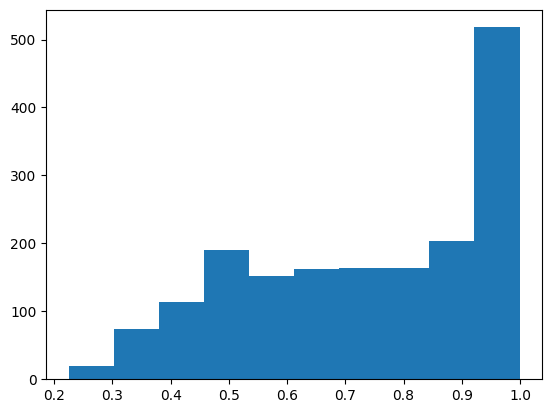

In [ ]:
plt.hist(confidence_scores)

In [ ]:
np.sum(confidence_scores < .9) / len(confidence_scores)

np.float64(0.6636363636363637)

In [ ]:
np.sum(confidence_scores < .8) / len(confidence_scores)

np.float64(0.5363636363636364)

In [ ]:
np.sum(confidence_scores < .95) / len(confidence_scores)

np.float64(0.7693181818181818)